In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
df=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week2/lab-eda-bivariate/Data/amz_uk_price_prediction_dataset.csv")

In [494]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [495]:
crosstab_1=pd.crosstab(df["category"],df["isBestSeller"])

In [496]:
crosstab_1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [497]:
crosstab_2=crosstab_1.copy()
crosstab_2["proporcion"]=(crosstab_1[True]/crosstab_1.sum(axis=1))*100
crosstab_2

isBestSeller,False,True,proporcion
category,,,
3D Printers,247,1,0.403226
3D Printing & Scanning,4065,2,0.049176
Abrasive & Finishing Products,245,5,2.000000
Action Cameras,1696,1,0.058928
Adapters,251,3,1.181102
...,...,...,...
Wind Instruments,243,7,2.800000
Window Treatments,234,5,2.092050
Women,17559,213,1.198515


In [498]:
"""Are there categories where being a best-seller is more prevalent?
yes in this case for example the wild instruments or windows are the one that are the most prevelant in proportion false-true
"""

'Are there categories where being a best-seller is more prevalent?\nyes in this case for example the wild instruments or windows are the one that are the most prevelant in proportion false-true\n'

In [499]:
from scipy.stats import chi2_contingency

In [500]:
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_1)

In [501]:
chi2_pvalue

0.0

In [502]:
"""
Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
it is dependent because chipvalue is less than .5 in fact it is 0 which means there is a strong association between the variables
"""

'\nConduct a Chi-square test to determine if the best-seller distribution is independent of the product category.\nit is dependent because chipvalue is less than .5 in fact it is 0 which means there is a strong association between the variables\n'

In [503]:
from scipy.stats.contingency import association

In [504]:
association(crosstab_1, method="cramer")

0.1222829439760564

In [505]:
"""
the data is more closer to 0 than to 1 so this means that the data is not that strong related
"""

'\nthe data is more closer to 0 than to 1 so this means that the data is not that strong related\n'

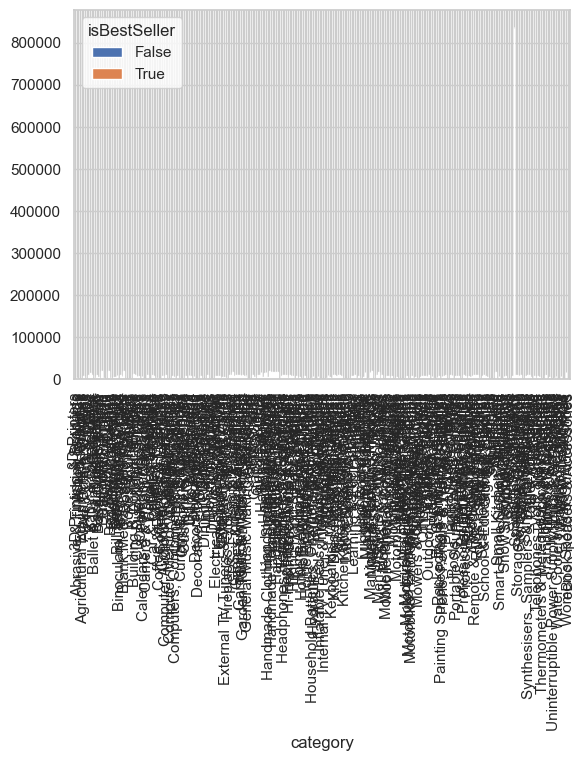

In [506]:
crosstab_1.plot(kind='bar', stacked=True)
plt.show()

In [507]:
"""Part 2: Exploring Product Prices and Ratings Across Categories and Brands"""

'Part 2: Exploring Product Prices and Ratings Across Categories and Brands'

In [508]:
product_df=df.copy()

In [509]:
def outliers_remover(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    higher=Q3+1.5*IQR
    not_outliers=df[(df[column]>lower)& (df[column]<higher)]
    return not_outliers

In [510]:
product_df=outliers_remover(product_df,"price")

In [511]:
product_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [512]:

counts=product_df["category"].value_counts()
product_df["category_counts"]=product_df["category"].map(counts)

In [513]:
product_df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,category_counts
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,6279
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,6279
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,6279
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,6279
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,6279
...,...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing,452
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing,452
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing,452
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing,452


In [514]:
top=product_df.sort_values(by="category_counts",ascending=False)

In [515]:
top_20=top.drop_duplicates(subset="category",keep="first")

In [516]:
top20=top_20.head(20)

In [517]:
top20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,category_counts
1220207,1347315,B0C99HFMHX,"Pilipane Brushless Controller, Aluminium Alloy...",0.0,0,28.89,False,0,Sports & Outdoors,694092
1850056,2078820,B09FZ8SBVS,Smukdoo Disposable Wooden Waxing Spatulas Wax ...,4.5,284,3.99,False,1000,Beauty,19233
617444,665597,B001GR1C80,Goat's Milk Moisturising Cream 100g Psoriasis ...,4.1,260,22.95,False,0,Bath & Body,19050
644760,693545,B094G85JR2,"Dirty Works Smooth Walker Foot Butter, Vegan P...",4.4,335,4.00,False,200,Manicure & Pedicure Products,18904
1578207,1778037,B08LSQTPH8,Unisex 3D Cotton Scarf Mask,0.0,0,7.50,False,0,"Handmade Clothing, Shoes & Accessories",18811
1031236,1140206,B07F96Z9P8,"Revolution Pro, Microblading Precision Eyebrow...",4.2,187,4.99,False,300,Make-up,18718
275677,292785,B0C69DHSJW,"2PCS Turmeric Serum for Dark Spots,Turmeric Da...",3.4,6,11.04,False,0,Skin Care,18686
2214935,2561675,B013K8LG4M,Zac's Alter Ego Very Large Satin-Feel Rose Flo...,3.9,11,11.99,False,0,Hair Care,18625
570575,614865,B08YNVPBS5,Grey Map Jasper Gemstone & 20mm Sterling Silve...,0.0,0,9.95,False,0,Birthday Gifts,18398
120500,129748,B09TRFP8XL,Personalised Tooth Fairy Wooden Heart Trinket ...,0.0,0,12.50,False,0,Handmade Gifts,17948


C:\Users\igara\AppData\Local\Temp\ipykernel_33188\2549390789.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_20, x="category", y="price", palette="coolwarm")


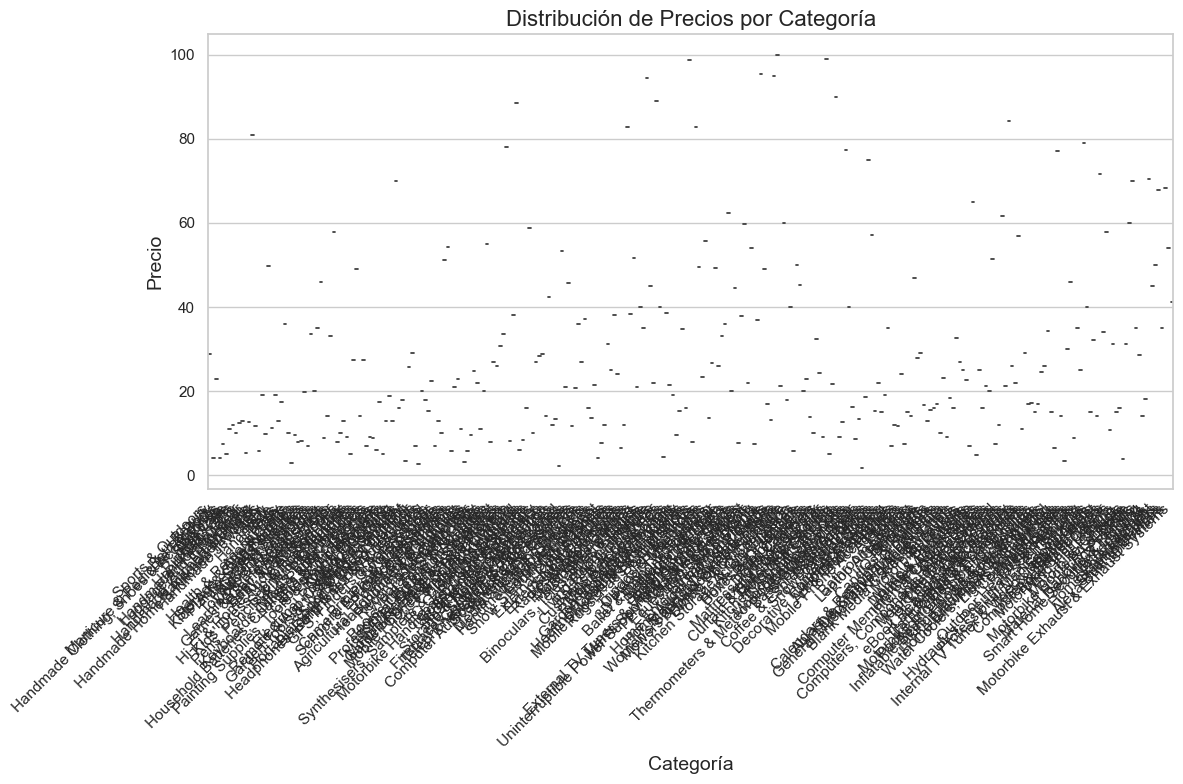

'Chat_gpt para hacerlos mas legible'

In [518]:
sns.set(style="whitegrid")

# Crear el gráfico de violín
plt.figure(figsize=(12, 8))  # Ajustar tamaño del gráfico
sns.violinplot(data=top_20, x="category", y="price", palette="coolwarm")

# Añadir título y etiquetas a los ejes
plt.title("Distribución de Precios por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Precio", fontsize=14)

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el gráfico para que no se corte
plt.show()
"""Chat_gpt para hacerlos mas legible"""

In [519]:
"""Which product category tends to have the highest median price? Don't filter here by top categories."""

"Which product category tends to have the highest median price? Don't filter here by top categories."

In [520]:
median_price=product_df.groupby("category")["price"].median()
median_price.idxmax()# idxmax() devuelve el índice con el valor máximo

'Desktop PCs'

In [521]:
"""desktop pcs have the highest median price"""

'desktop pcs have the highest median price'

In [522]:
top_10=top.copy()

In [523]:
top_10=top_10.groupby("category")["price"].mean().reset_index()

In [524]:
top_10=top_10.sort_values(by="price",ascending=False)

In [525]:
top_10=top_10.head(10)

C:\Users\igara\AppData\Local\Temp\ipykernel_33188\36623042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="category", y="price", palette="coolwarm", errorbar=None)


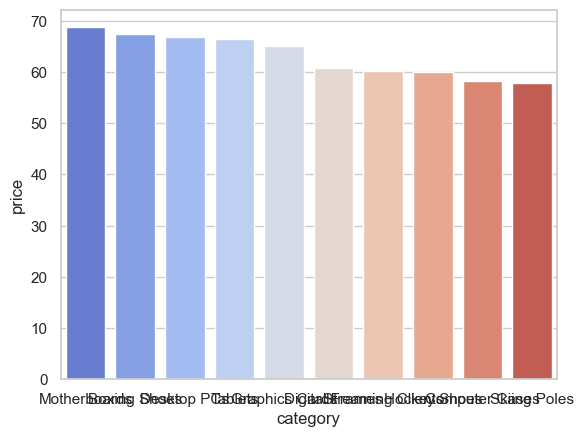

In [526]:
sns.barplot(data=top_10, x="category", y="price", palette="coolwarm", errorbar=None)
plt.show()

In [609]:
stars_filt=product_df[product_df["stars"]>0]
counts_stars=stars_filt["stars"].value_counts()
product_df["stars_count"]=product_df["stars"].map(counts_stars)

In [611]:
product_df=product_df.sort_values(by="category_counts",ascending=False)
product_df=product_df.drop_duplicates(subset="category",keep="first")

In [613]:
review=product_df.head(10)

In [615]:
review

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,category_counts,reviews_count,stars_count
1541078,1737522,B094JSZWMS,CMP Boy's Stretch Fleece Sweatshirt with Hood ...,5.0,1,32.99,False,0,Sports & Outdoors,694092,292,183
815366,890275,B08HR1V58C,Bacterisan Hospigel 5 L | Protective Dermo-Eco...,4.0,1,35.28,False,0,Beauty,19233,292,41
630267,678720,B09VPV2LVR,Bath Brush with Extra-Long Ergonomic Handle & ...,4.0,1,9.99,False,0,Bath & Body,19050,292,41
648362,697238,B0CF1XM7RC,540 PCS Lint Free Wipes for Nails Varnish Remo...,5.0,1,3.99,False,0,Manicure & Pedicure Products,18904,292,183
1567433,1766879,B0BWH3R7RQ,"Wedding Socks for Groom, Best Man, Groomsman, ...",5.0,1,5.99,False,0,"Handmade Clothing, Shoes & Accessories",18811,292,183
1030566,1139501,B09C3GNYX4,Metaleks Eyelash Extension Tweezers Japanese S...,5.0,1,9.99,False,0,Make-up,18718,292,183
277578,294807,B0B6493BFX,NIVEA SUN Kids Protect and Care SPF 50+ Trigge...,1.0,1,8.90,False,0,Skin Care,18686,292,35
2206229,2552552,B0C9Z9Q6JK,2 Pcs Small Round Hair Brush for Blow Drying N...,2.0,1,4.99,False,0,Hair Care,18625,292,13
570519,614809,B08ZHKHH9H,Tottenham Hotspur Football Club Stadium Prints...,5.0,1,55.00,False,0,Birthday Gifts,18398,292,183
126071,136407,B09YLWWZ3X,"Vintage style bracelet, necklace and earrings ...",3.0,1,44.50,False,0,Handmade Gifts,17948,292,22


C:\Users\igara\AppData\Local\Temp\ipykernel_33188\2295606809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=review, x="category", y="stars_count", palette="coolwarm")


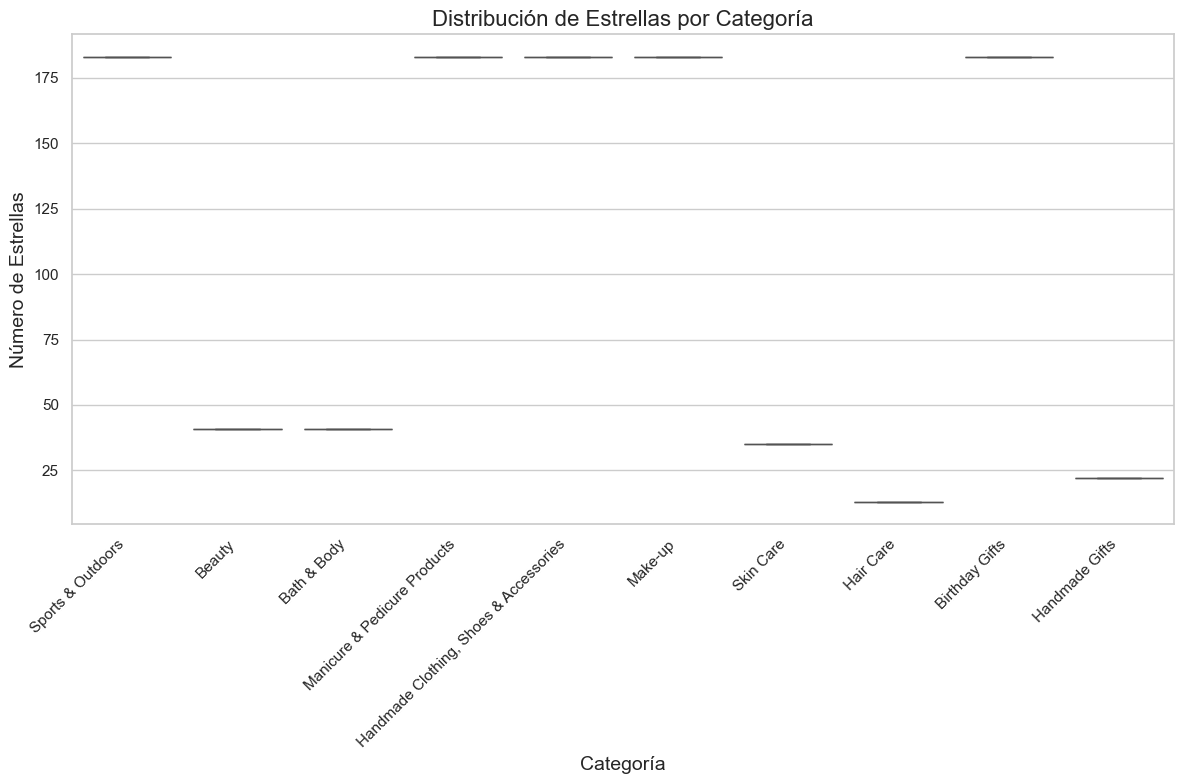

In [623]:
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.boxplot(data=review, x="category", y="stars_count", palette="coolwarm")

# Añadir título y etiquetas a los ejes
plt.title("Distribución de Estrellas por Categoría", fontsize=16)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Número de Estrellas", fontsize=14)

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha="right")

# Ajustar el gráfico para que no se corte
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [627]:
median_star=product_df.groupby("category")["stars"].median()
median_star.idxmax()

'3D Printing & Scanning'

In [ ]:
"""Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
3D Printing & Scanning

In [ ]:
"""Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?"""

In [629]:
# Calculating the Pearson correlation coefficient between price and stars
round(float(df["price"].corr(df["stars"], method="pearson")), 2)

-0.12

In [631]:
"""this means it has negative linear correlation but is also close to 0 this means that if the prices increase the stars tend to go down slightly
"""



'this means it has negative linear correlation but is also close to 0 this means that if the prices increase the stars tend to go down slightly\n'

In [ ]:
"""
Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
that the 1 stars product tend to be cheap without so many outliers
"""

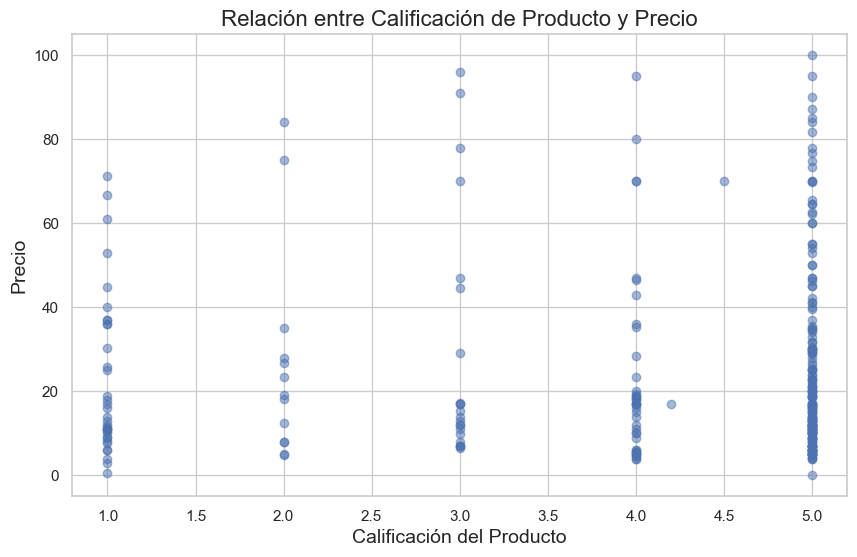

In [635]:
# Suponiendo que tienes un DataFrame llamado 'product_df'
# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(product_df['stars'], product_df['price'], alpha=0.5)

# Agregar etiquetas y título
plt.title('Relación entre Calificación de Producto y Precio', fontsize=16)
plt.xlabel('Calificación del Producto', fontsize=14)
plt.ylabel('Precio', fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
"""
Use a correlation heatmap to visualize correlations between all numerical variables.

"""

In [643]:
numerical=df.select_dtypes(include="number")
correl=numerical.corr()

<Axes: >

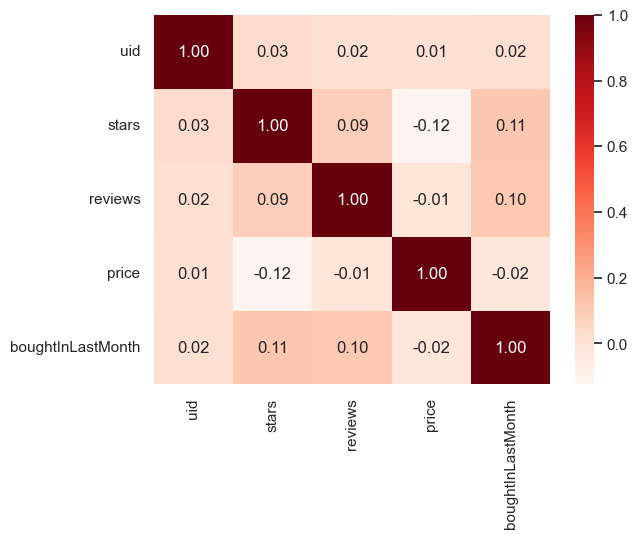

In [647]:
sns.heatmap(correl, annot=True, cmap="Reds", fmt=".2f")

In [ ]:
"""
Examine if product prices typically follow a normal distribution using a QQ plot.
"""

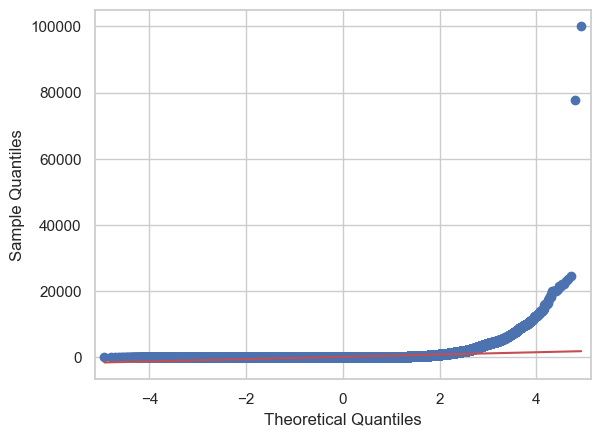

In [651]:
import statsmodels.api as sm

sm.qqplot(df["price"], line="s");
plt.show()

In [ ]:
""" the data does not follows the red line which means it doesnt have  a normal distribution